# Manual Labeling

Visually evaluate time series summary data and select cut-points to best label the data as (1) healthy, (2) faulty, and (3) failed.

Focus on Bearings 3 and 4 in Test 1. These two bearings had failed by the end of the experiment. Bearings 1 and 2 did not fail, and so lack stage 3 failure. 

"At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4."

In [1]:
# Load packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Test 1 - Bearing 3x

### Import data

Truncate the first 160 observations due to known data error identified in the Exploratory Data Analysis (See "EDA-Test1.ipynb").

In [2]:
ts_b3x = pd.read_csv("Data/IMS/TS/ts_b3x_ds10.csv")
ts_b3x = ts_b3x.iloc[160:,]
ts_b3x.shape

(1996, 21)

### Absolute Mean Signal

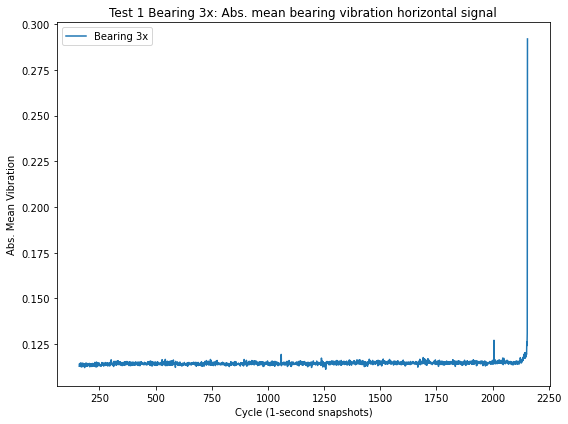

In [3]:
plt.figure(figsize=(8,6))
plt.plot(ts_b3x['mean_abs'], label='Bearing 3x')
plt.ylabel("Abs. Mean Vibration")
plt.xlabel("Cycle (1-second snapshots)")
plt.title("Test 1 Bearing 3x: Abs. mean bearing vibration horizontal signal")
plt.tight_layout()
plt.legend()
plt.show()

When does absolute mean signal spike at the end of the series?

In [4]:
ts_b3x.loc[2140:,'mean_abs']

2140    0.117460
2141    0.117781
2142    0.117411
2143    0.120254
2144    0.117298
2145    0.119469
2146    0.120375
2147    0.119952
2148    0.118888
2149    0.118038
2150    0.119765
2151    0.119454
2152    0.126142
2153    0.124250
2154    0.131027
2155    0.291966
Name: mean_abs, dtype: float64

At the very end! Basically at the final observation.

### Kurtosis

In [5]:
ts_b3x['kt_EMA'] = ts_b3x['ktosis'].ewm(span=40,adjust=False).mean()

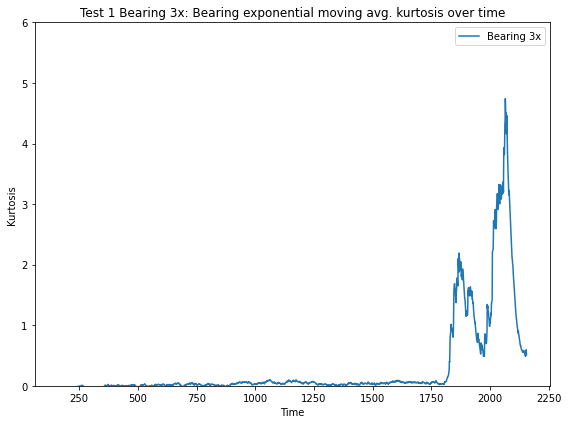

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ts_b3x['kt_EMA'], label='Bearing 3x')
plt.ylabel("Kurtosis")
plt.xlabel("Time")
plt.title("Test 1 Bearing 3x: Bearing exponential moving avg. kurtosis over time")
plt.tight_layout()
plt.ylim((0, 6))
plt.legend()
plt.show()

When does the exponential moving average of kurtosis first spike? 

In [7]:
ts_b3x.loc[1820:1845,'kt_EMA']

1820    0.144032
1821    0.156119
1822    0.173569
1823    0.179172
1824    0.210787
1825    0.229635
1826    0.291657
1827    0.404987
1828    0.394772
1829    0.628329
1830    0.792593
1831    0.845184
1832    0.879833
1833    0.909116
1834    1.015024
1835    0.976695
1836    0.931048
1837    0.952847
1838    0.911841
1839    0.933137
1840    0.892046
1841    0.854303
1842    0.811549
1843    0.801934
1844    0.940146
1845    1.227922
Name: kt_EMA, dtype: float64

Break point is ~ Obs. 1825.

### Bearing 3x manual labels
 - Stage 1 (healthy) - until EMA of kurtosis spikes, excluding the initial data issue. (Obs 160-1825)
 - Stage 2 (faulty) - from when EMA of kurtosis spikes until absolute mean spikes (Obs 1826-2153).
 - Stage 3 (failed) - absolute mean spikes at the very end of the series (Obs 2154-2155).

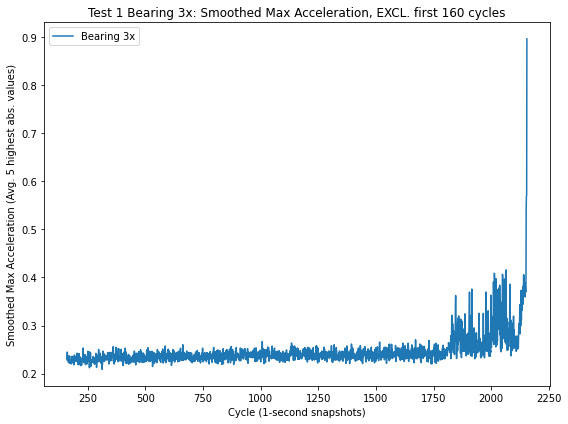

In [8]:
# smoothed maximum acceleration calculated by avg. 5 highest absolute acceleration measurements in the time domain.
plt.figure(figsize=(8,6))
plt.plot(ts_b3x['abs_acc_5'], label='Bearing 3x')
plt.ylabel("Smoothed Max Acceleration (Avg. 5 highest abs. values)")
plt.xlabel("Cycle (1-second snapshots)")
plt.title("Test 1 Bearing 3x: Smoothed Max Acceleration, EXCL. first 160 cycles")
plt.tight_layout()
plt.legend()
plt.show()

In [9]:
ts_b3x.loc[1820:1845,'abs_acc_5']

1820    0.244365
1821    0.243870
1822    0.250635
1823    0.263576
1824    0.266759
1825    0.278832
1826    0.231179
1827    0.259329
1828    0.265854
1829    0.321474
1830    0.306536
1831    0.287798
1832    0.250269
1833    0.304045
1834    0.279823
1835    0.264552
1836    0.243740
1837    0.289059
1838    0.264026
1839    0.244309
1840    0.247663
1841    0.239345
1842    0.247663
1843    0.287338
1844    0.268882
1845    0.345674
Name: abs_acc_5, dtype: float64

The **Smoothed Max Acceleration**, as defined by Sahoo & Mohanty, picks up bearing degradation around obs. 1829, at the same time as the exponential-moving average Kurtosis spikes!

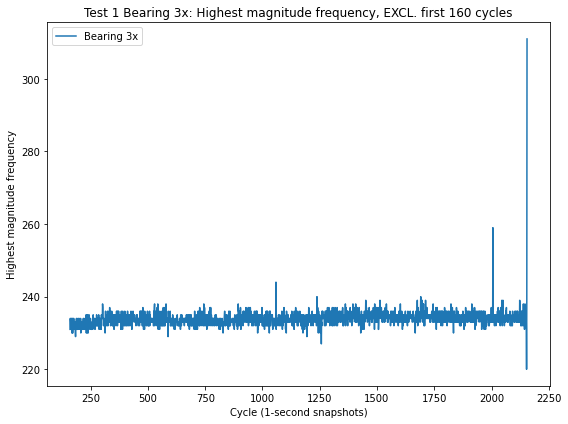

In [10]:
# highest magnitude frequency of each observation
    #max_freq
plt.figure(figsize=(8,6))
plt.plot(ts_b3x['max_freq'], label='Bearing 3x')
plt.ylabel("Highest magnitude frequency")
plt.xlabel("Cycle (1-second snapshots)")
plt.title("Test 1 Bearing 3x: Highest magnitude frequency, EXCL. first 160 cycles")
plt.tight_layout()
plt.legend()
plt.show()

The **Highest-magnitude frequency**, as defined by Sahoo & Mohanty, does not appear to identify bearing degradation until the very end of the time series, at failure (final 2 observations).

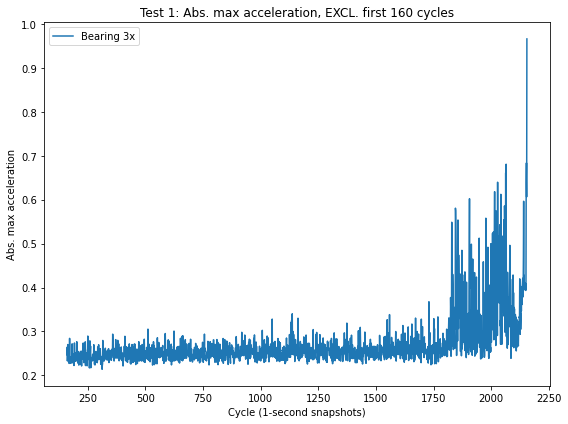

In [11]:
# Abs. max acceleration
plt.figure(figsize=(8,6))
plt.plot(ts_b3x['max_abs'], label='Bearing 3x')
plt.ylabel("Abs. max acceleration")
plt.xlabel("Cycle (1-second snapshots)")
plt.title("Test 1: Abs. max acceleration, EXCL. first 160 cycles")
plt.tight_layout()
plt.legend()
plt.show()

The **Abs. Max Acceleration** in each cycle, similar to the smoothed version above defined by Sahoo & Mohanty, picks up bearing degradation around cycle 1800, at the same time as the exponential-moving average Kurtosis spikes!

## Test 1 - Bearing 4x

### Import data

Truncate the first 160 observations due to known data error identified in the Exploratory Data Analysis (See "EDA-Test1.ipynb").

In [12]:
ts_b4x = pd.read_csv("Data/IMS/TS/ts_b4x_ds10.csv")
ts_b4x = ts_b4x.iloc[160:,]
ts_b4x.shape

(1996, 21)

### Absolute Mean Signal

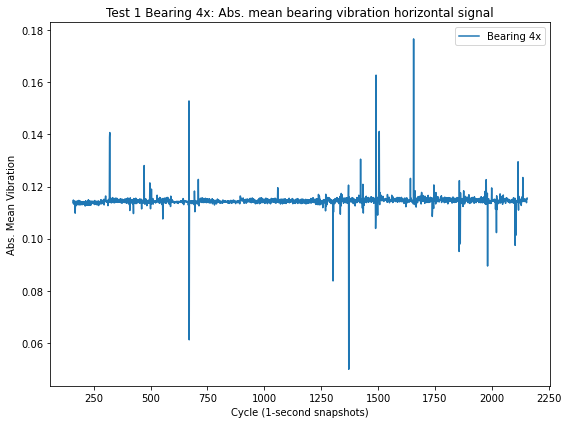

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ts_b4x['mean_abs'], label='Bearing 4x')
plt.ylabel("Abs. Mean Vibration")
plt.xlabel("Cycle (1-second snapshots)")
plt.title("Test 1 Bearing 4x: Abs. mean bearing vibration horizontal signal")
plt.tight_layout()
plt.legend()
plt.show()

No clear, observable trend in the abs. mean acceleration across the experiment.

### Kurtosis

In [14]:
ts_b4x['kt_EMA'] = ts_b4x['ktosis'].ewm(span=40,adjust=False).mean()

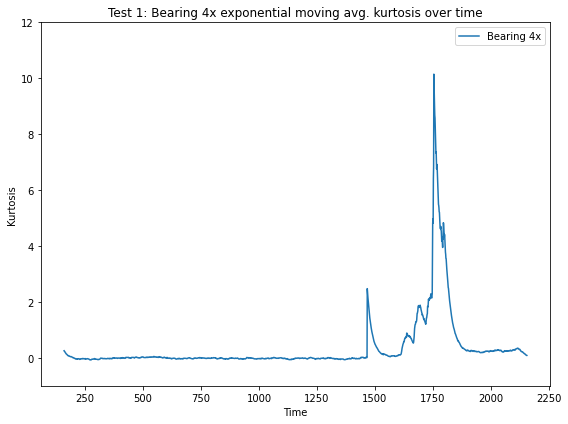

In [15]:
plt.figure(figsize=(8,6))
plt.plot(ts_b4x['kt_EMA'], label='Bearing 4x')
plt.ylabel("Kurtosis")
plt.xlabel("Time")
plt.title("Test 1: Bearing 4x exponential moving avg. kurtosis over time")
plt.tight_layout()
plt.ylim((-1,12))
plt.legend()
plt.show()

When does the exponential moving average of kurtosis first spike?

In [16]:
ts_b4x.loc[1460:1480,'kt_EMA']

1460    0.007917
1461    0.009265
1462    0.005214
1463    0.006793
1464    0.009078
1465    0.016789
1466    0.011222
1467    2.475984
1468    2.351518
1469    2.249726
1470    2.136087
1471    2.043550
1472    1.943956
1473    1.849552
1474    1.760262
1475    1.671342
1476    1.578265
1477    1.496940
1478    1.421522
1479    1.357690
1480    1.289692
Name: kt_EMA, dtype: float64

In [17]:
ts_b4x.loc[1750:1780,'kt_EMA']

1750     4.967252
1751     4.813420
1752     6.409186
1753     6.850187
1754    10.148659
1755     9.723958
1756     9.363566
1757     8.997995
1758     8.681064
1759     8.580066
1760     8.191002
1761     7.944549
1762     7.609289
1763     7.329175
1764     7.371535
1765     7.066142
1766     6.757001
1767     6.919607
1768     6.887512
1769     6.660668
1770     6.466049
1771     6.184819
1772     5.962123
1773     5.717999
1774     5.491690
1775     5.448319
1776     5.365320
1777     5.222629
1778     5.206339
1779     5.008496
1780     4.882868
Name: kt_EMA, dtype: float64

EMA Kurtosis spikes first at obs. 1467, and again at obs. 1754.

### Bearing 4x manual labels
 - Stage 1 (healthy) - until EMA of kurtosis spikes, excluding the initial data issue. (Obs 160-1466)
 - Stage 2 (faulty) - from when EMA of kurtosis spikes until it drops again (Obs 1467-1849).
 - Stage 3 (failed) - the remainder of the series (Obs 1850-1996).

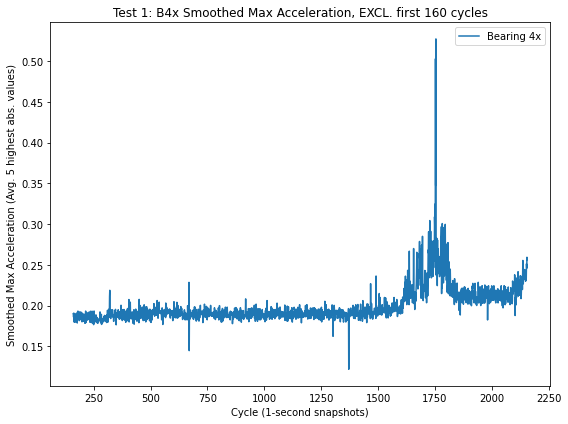

In [18]:
# smoothed maximum acceleration calculated by avg. 5 highest absolute acceleration measurements in the time domain.
plt.figure(figsize=(8,6))
plt.plot(ts_b4x['abs_acc_5'], label='Bearing 4x')
plt.ylabel("Smoothed Max Acceleration (Avg. 5 highest abs. values)")
plt.xlabel("Cycle (1-second snapshots)")
plt.title("Test 1: B4x Smoothed Max Acceleration, EXCL. first 160 cycles")
plt.tight_layout()
plt.legend()
plt.show()

In [19]:
ts_b4x.loc[1650:1670,'abs_acc_5']

1650    0.213007
1651    0.203549
1652    0.217208
1653    0.207085
1654    0.213631
1655    0.225868
1656    0.270086
1657    0.222963
1658    0.202453
1659    0.211120
1660    0.208736
1661    0.195294
1662    0.216915
1663    0.203085
1664    0.211513
1665    0.216082
1666    0.205566
1667    0.221331
1668    0.227172
1669    0.241218
1670    0.265483
Name: abs_acc_5, dtype: float64

The **Smoothed Max Acceleration**, as defined by Sahoo & Mohanty, picks up bearing degradation around cycle 1656, slightly after the exponential-moving average Kurtosis spikes.

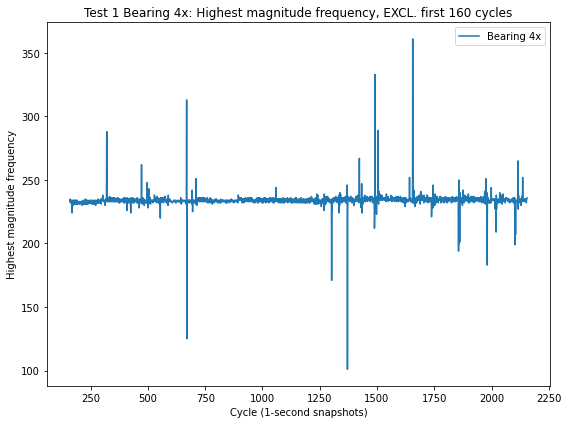

In [20]:
# highest magnitude frequency of each observation
    #max_freq
plt.figure(figsize=(8,6))
plt.plot(ts_b4x['max_freq'], label='Bearing 4x')
plt.ylabel("Highest magnitude frequency")
plt.xlabel("Cycle (1-second snapshots)")
plt.title("Test 1 Bearing 4x: Highest magnitude frequency, EXCL. first 160 cycles")
plt.tight_layout()
plt.legend()
plt.show()

The **Highest-magnitude frequency**, is not useful.

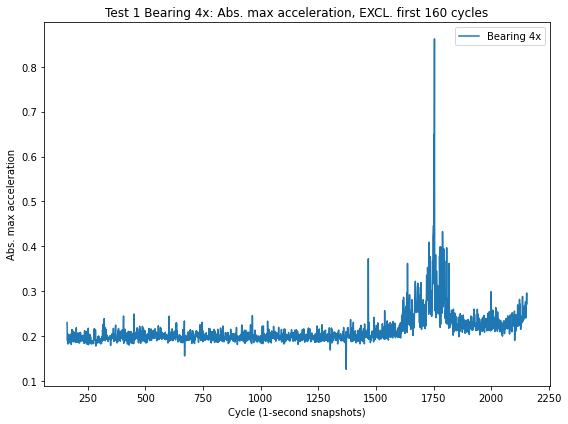

In [21]:
# Abs. max acceleration
plt.figure(figsize=(8,6))
plt.plot(ts_b4x['max_abs'], label='Bearing 4x')
plt.ylabel("Abs. max acceleration")
plt.xlabel("Cycle (1-second snapshots)")
plt.title("Test 1 Bearing 4x: Abs. max acceleration, EXCL. first 160 cycles")
plt.tight_layout()
plt.legend()
plt.show()

The **Abs. Max Acceleration** in each cycle, similar to the smoothed version above defined by Sahoo & Mohanty, picks up bearing degradation around cycle 1800, at the same time as the exponential-moving average Kurtosis spikes!

# Conclusions

Based on research and the exploratory data analysis, I identified four candidate time-domain measures that have potential predictive value and could be used as candidates for the manual labeling task.

 1. **Exponential moving average (EMA) of kurtosis** based on Sutrisno, Oh, et. al.
 2. **Highest magnitude frequency** of each observation based on Sahoo and Mohanty.
 3. **Smoothed maximum acceleration** calculated by averaging five highest absolute acceleration measurements in the time domain, from Sahoo and Mohanty.
 4. **Absolute maximum acceleration** based on the single maximum accelration in each observation, similar to the smoothed maximum acceleration.
 
After evaluating these four features on Bearings 3x and 4x from Test 1 (I focused on bearings that failed in the experimental data), I selected **EMA Kurtosis** and **Smoothed max. acceleration** as the two features to use for assigning manual labels.

The manual labels will be applied such that bearings known to end in failure in the IMS data will have 3 classes (healthy, faulty, and failed), while bearings that had not failed at the end of the experiment will be classified into two states (healthy and faulty).